In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

TypeError: ignored

In [ ]:
df = pd.read_csv('atp_data.csv')

In [ ]:
df.describe(include=object)

,Location,Tournament,Date,Series,Court,Surface,Round,Winner,Loser,Comment
count,44708,44708,44708,44708,44708,44708,44708,44708,44708,44708
unique,115,207,4104,8,2,4,8,899,1400,4
top,Paris,Australian Open,2000-01-17,International,Outdoor,Hard,1st Round,Federer R.,Lopez F.,Completed
freq,2784,2159,127,10792,36532,23799,20728,970,369,43015


In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44708 entries, 0 to 44707
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATP         44708 non-null  int64  
 1   Location    44708 non-null  object 
 2   Tournament  44708 non-null  object 
 3   Date        44708 non-null  object 
 4   Series      44708 non-null  object 
 5   Court       44708 non-null  object 
 6   Surface     44708 non-null  object 
 7   Round       44708 non-null  object 
 8   Best of     44708 non-null  int64  
 9   Winner      44708 non-null  object 
 10  Loser       44708 non-null  object 
 11  WRank       44708 non-null  int64  
 12  LRank       44708 non-null  int64  
 13  Wsets       44521 non-null  float64
 14  Lsets       44521 non-null  float64
 15  Comment     44708 non-null  object 
 16  PSW         32743 non-null  float64
 17  PSL         32743 non-null  float64
 18  B365W       39037 non-null  float64
 19  B365L       39057 non-nul

In [ ]:
df['Wsets'] = df['Wsets'].fillna(value = 0)
df['Lsets'] = df['Lsets'].fillna(value = 0)

In [ ]:
import seaborn as sns
sns.set_theme()

df_with_odds = df.dropna()

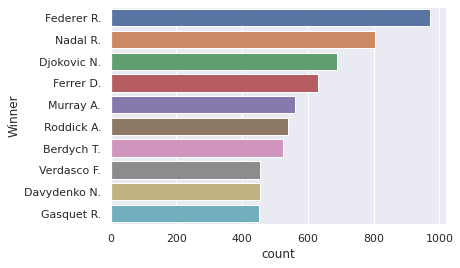

In [ ]:
sns.countplot(y = 'Winner', data = df, order=df['Winner'].value_counts().iloc[:10].index);

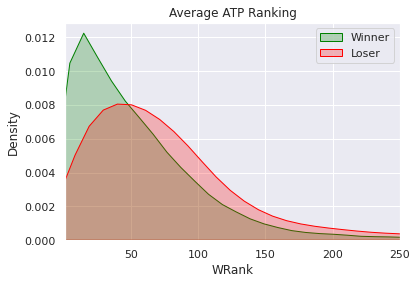

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(1, 250)
sns.kdeplot(df['WRank'], shade = True, color = 'green', label = 'Winner')
sns.kdeplot(df['LRank'], shade = True, color = 'red', label = 'Loser')
plt.title('Average ATP Ranking')
plt.legend();

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


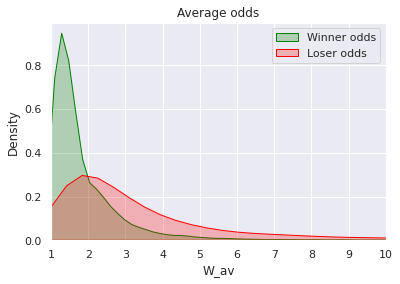

In [ ]:
df_with_odds.loc['W_av'] = (df_with_odds['B365W'] + df_with_odds['PSW'])/2
df_with_odds.loc['L_av'] = (df_with_odds['B365L'] + df_with_odds['PSL'])/2

fig, ax = plt.subplots()
ax.set_xlim(1, 10)
sns.kdeplot(df_with_odds['W_av'], shade = True, color = 'green', label = 'Winner odds')
sns.kdeplot(df_with_odds['L_av'], shade = True, color = 'red', label = 'Loser odds')
plt.title('Average odds')
plt.legend();

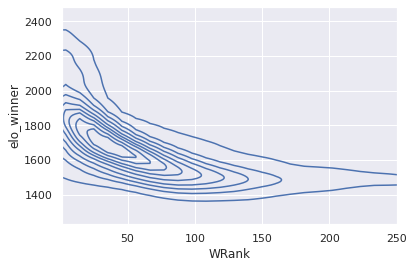

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(1, 250)
sns.relplot(x= 'WRank', y = 'elo_winner', data = df);

In [ ]:
df_with_odds.describe()

,ATP,Best of,WRank,LRank,Wsets,Lsets,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo,W_av,L_av
count,32343.000000,32343.000000,32343.000000,32343.000000,32343.000000,32343.000000,32343.000000,32343.000000,32343.000000,32343.000000,32343.000000,32343.000000,32343.000000,32343.000000,32343.000000
mean,32.583650,3.383267,57.288007,89.779365,2.136784,0.404724,1.928351,4.217422,1.824985,3.604975,1710.399808,1626.265159,0.594336,1.876668,3.911198
std,18.144293,0.787184,72.247618,113.070478,0.485358,0.558388,1.362765,5.612522,1.136923,3.576836,183.925763,142.468092,0.208119,1.242086,4.475925
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.010000,1.000000,1.002000,1323.901480,1333.921402,0.008899,1.000000,1.006000
25%,19.000000,3.000000,16.000000,34.000000,2.000000,0.000000,1.270000,1.794000,1.220000,1.720000,1574.802576,1515.589747,0.445559,1.246000,1.745750
50%,32.000000,3.000000,40.000000,64.000000,2.000000,0.000000,1.549000,2.660000,1.500000,2.500000,1681.964648,1602.451926,0.605650,1.511500,2.610000
75%,49.000000,3.000000,75.000000,103.000000,2.000000,1.000000,2.140000,4.280000,2.075000,4.000000,1808.270606,1706.256689,0.757660,2.095000,4.130000
max,67.000000,5.000000,1890.000000,1890.000000,3.000000,2.000000,46.000000,121.000000,29.000000,101.000000,2392.408923,2392.595567,0.995601,37.500000,81.000000


In [ ]:
df_with_odds['PW_bookmakers'] = (1/df_with_odds['W_av'])/(1/df_with_odds['W_av']+ (1/df_with_odds['L_av']))
df_with_odds['PL_bookmakers'] = (1/df_with_odds['L_av'])/(1/df_with_odds['W_av']+ (1/df_with_odds['L_av']))

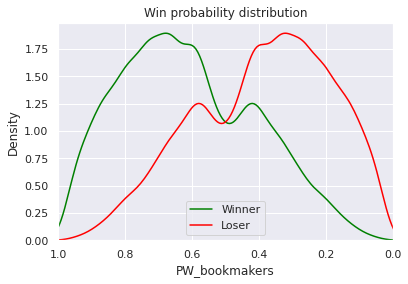

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(1,0)
sns.kdeplot(df_with_odds['PW_bookmakers'], shade = False, color = 'green', label = 'Winner')
sns.kdeplot(df_with_odds['PL_bookmakers'], shade = False, color = 'red', label = 'Loser')
plt.title('Win probability distribution')
plt.legend();

In [ ]:
df_with_odds['Did_favourite_win'] = pd.Series(dtype='int64')
df_with_odds = df_with_odds.reset_index()

for index in range(len(df_with_odds)):
  if df_with_odds['PW_bookmakers'][index] >=  df_with_odds['PL_bookmakers'][index]:
    df_with_odds['Did_favourite_win'][index] = 1
  else :
    df_with_odds['Did_favourite_win'][index] = 0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_with_odds['Did_favourite_win'].value_counts(normalize = True)

1.0    0.704171
0.0    0.295829
Name: Did_favourite_win, dtype: float64

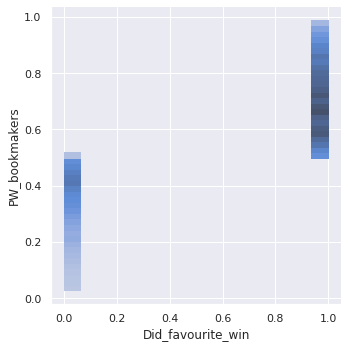

In [ ]:
sns.displot(y = 'PW_bookmakers', x = 'Did_favourite_win', data = df_with_odds);

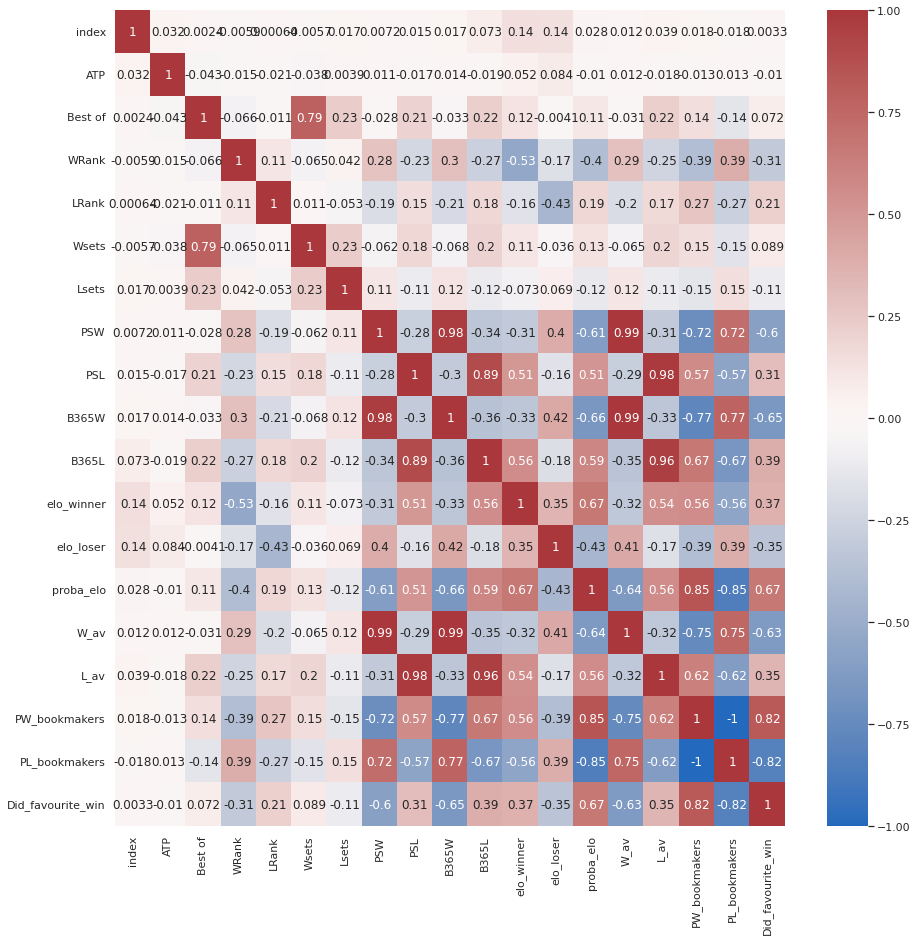

In [ ]:

fig, ax = plt.subplots(figsize=(15,15))

df2 = df_with_odds.corr()
sns.heatmap(df2,annot = True, ax = ax, cmap = 'vlag');

In [ ]:
df['Locations'] = df['Location'].replace(['Adelaide','Doha','Chennai','Sydney','Auckland','Melbourne','San Jose','Marseille','Dubai','Rotterdam','Memphis','Mexico City','London','Santiago','Delray Beach','Copenhagen','Scottsdale','Bogota','Indian Wells','Miami','Casablanca','Estoril','Atlanta','Monte Carlo','Barcelona','Orlando','Munich','Mallorca','Rome','Hamburg','St. Polten','Paris','Queens Club','Halle','s-Hertogenbosch','Nottingham','Gstaad','Newport','Bastad','Stuttgart','Umag','Amsterdam','San Marino','Los Angeles','Kitzbuhel','Toronto','Cincinnati','Washington','Indianapolis','Long Island','New York','Tashkent','Bucharest','Palermo','Hong Kong','Vienna','Tokyo','Toulouse','Shanghai','Moscow','Basel','St. Petersburg','Lyon','Stockholm','Brighton','Lisbon','Milan','Vina del Mar','Buenos Aires','Acapulco','Houston','Amersfoort','Sopot','Salvador','Madrid','Valencia','Montreal','Costa Do Sauipe','Bangkok','Metz','Beijing','New Haven','Ho Chi Min City','Zagreb','Las Vegas','Portschach','Mumbai','Warsaw','Brisbane','Johannesburg','Belgrade','Eastbourne','Kuala Lumpur','Nice','Montpellier','Winston-Salem','Sao Paulo','Oeiras','Dusseldorf','Quito','Rio de Janeiro','Istanbul','Geneva','Shenzhen','Sofia','Marrakech','Los Cabos','Chengdu','Antwerp','Budapest','Antalya','Pune'],['Australia','Qatar','India','Australia','Australia','Australia','United States','France','United Arab Emirates','Netherlands','United States','Mexico','United Kingdom','Chile','United States','Denmark','United States','Colombia','United States','United States','Morocco','Portugal','United States','Monaco','Spain','United States','Germany','Spain','Italy','Germany','Austria','France','United Kingdom','Germany','Netherlands','United Kingdom','Switzerland','United States','Sweden','Germany','Croatia','Netherlands','San Marino','United States','Austria','Canada','United States','United States','United States','United States','United States','Uzbekistan','Romania','Italy','Hong Kong','Austria','Japan','France','China','Russia','Switzerland','Russia','France','Sweden','United Kingdom','Portugal','Italy','Chile','Argentina','Mexico','United States','Netherlands','Poland','Brazil','Spain','Spain','Canada','Brazil','Thailand','France','China','United States','Vietnam','Croatia','United States','Austria','India','Poland','Australia','South Africa','Serbia','United Kingdom','Malaysia','France','France','United States','Brazil','Portugal','Germany','Ecuador','Brazil','Turkey','Switzerland','China','Bulgaria','Morocco','Mexico','China','Belgium','Hungary','Turkey','India'])

In [ ]:
df = df.drop(['Locations'],axis = 1)

In [ ]:
df['Location_flag_code'] = df['Location'].replace(['Adelaide','Chennai','Doha','Auckland','Sydney','Melbourne','Milan','Marseille','San Jose','Vina del Mar','Buenos Aires','Memphis','Rotterdam','Acapulco','Copenhagen','Dubai','Delray Beach','Scottsdale','Indian Wells','Miami','Casablanca','Estoril','Monte Carlo','Barcelona','Houston','Munich','Valencia','Rome','Hamburg','St. Polten','Paris','Halle','Nottingham','London','Bastad','Gstaad','Newport','Amersfoort','Stuttgart','Indianapolis','Kitzbuhel','Umag','Los Angeles','Sopot','Washington','Montreal','Cincinnati','Long Island','New York','Costa Do Sauipe','Bucharest','Bangkok','Palermo','Shanghai','Metz','Moscow','Tokyo','Lyon','Vienna','Madrid','Basel','St. Petersburg','Stockholm','Toronto','Beijing','New Haven','Ho Chi Min City','Zagreb','Las Vegas','Mumbai','Warsaw','Brisbane','Johannesburg','Belgrade','Eastbourne','Kuala Lumpur','Santiago','Nice','Atlanta','Montpellier','Winston-Salem','Sao Paulo','Oeiras','Dusseldorf','Bogota','Rio de Janeiro','Shenzhen','Quito','Istanbul','Geneva','Sofia','Marrakech','Los Cabos','Chengdu','Antwerp','Budapest','Antalya','Pune','Cordoba','Zhuhai','Cologne','Sardinia','Nur-Sultan','Singapore','Cagliari','Marbella','Parma','Mallorca','San Diego','Turin','Dallas','s-Hertogenbosch','Seoul','Tel Aviv','Florence','Gijon'],['AUS','IND','QAT','NZL','AUS','AUS','ITA','FRA','USA','CHI','ARG','USA','NED','MEX','DEN','UAE','USA','USA','USA','USA','MAR','POR','MON','ESP','USA','GER','ESP','ITA','GER','AUT','FRA','GER','GBR','GBR','SWE','SUI','USA','NED','GER','USA','AUT','CRO','USA','POL','USA','CAN','USA','USA','USA','BRA','ROU','THA','ITA','CHN','FRA','RUS','JPN','FRA','AUT','ESP','SUI','RUS','SWE','CAN','CHN','USA','VIE','CRO','USA','IND','POL','AUS','RSA','SRB','AUS','MAS','CHI','FRA','USA','FRA','USA','BRA','POR','GER','COL','BRA','CHN','ECU','TUR','SUI','BUL','MAR','MEX','CHN','BEL','HUN','TUR','IND','ARG','CHN','GER','ITA','KAZ','SIN','ITA','ESP','ITA','ESP','USA','ITA','USA','NED','KOR','ISR','ITA','ESP'])

In [ ]:
df_clean = pd.read_csv("final_dataset_firstclean.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_clean['Location_flag_code'] = df_clean['Location'].replace(['Adelaide','Chennai','Doha','Auckland','Sydney','Melbourne','Milan','Marseille','San Jose','Vina del Mar','Buenos Aires','Memphis','Rotterdam','Acapulco','Copenhagen','Dubai','Delray Beach','Scottsdale','Indian Wells','Miami','Casablanca','Estoril','Monte Carlo','Barcelona','Houston','Munich','Valencia','Rome','Hamburg','St. Polten','Paris','Halle','Nottingham','London','Bastad','Gstaad','Newport','Amersfoort','Stuttgart','Indianapolis','Kitzbuhel','Umag','Los Angeles','Sopot','Washington','Montreal','Cincinnati','Long Island','New York','Costa Do Sauipe','Bucharest','Bangkok','Palermo','Shanghai','Metz','Moscow','Tokyo','Lyon','Vienna','Madrid','Basel','St. Petersburg','Stockholm','Toronto','Beijing','New Haven','Ho Chi Min City','Zagreb','Las Vegas','Mumbai','Warsaw','Brisbane','Johannesburg','Belgrade','Eastbourne','Kuala Lumpur','Santiago','Nice','Atlanta','Montpellier','Winston-Salem','Sao Paulo','Oeiras','Dusseldorf','Bogota','Rio de Janeiro','Shenzhen','Quito','Istanbul','Geneva','Sofia','Marrakech','Los Cabos','Chengdu','Antwerp','Budapest','Antalya','Pune','Cordoba','Zhuhai','Cologne','Sardinia','Nur-Sultan','Singapore','Cagliari','Marbella','Parma','Mallorca','San Diego','Turin','Dallas','s-Hertogenbosch','Seoul','Tel Aviv','Florence','Gijon'],['AUS','IND','QAT','NZL','AUS','AUS','ITA','FRA','USA','CHI','ARG','USA','NED','MEX','DEN','UAE','USA','USA','USA','USA','MAR','POR','MON','ESP','USA','GER','ESP','ITA','GER','AUT','FRA','GER','GBR','GBR','SWE','SUI','USA','NED','GER','USA','AUT','CRO','USA','POL','USA','CAN','USA','USA','USA','BRA','ROU','THA','ITA','CHN','FRA','RUS','JPN','FRA','AUT','ESP','SUI','RUS','SWE','CAN','CHN','USA','VIE','CRO','USA','IND','POL','AUS','RSA','SRB','AUS','MAS','CHI','FRA','USA','FRA','USA','BRA','POR','GER','COL','BRA','CHN','ECU','TUR','SUI','BUL','MAR','MEX','CHN','BEL','HUN','TUR','IND','ARG','CHN','GER','ITA','KAZ','SIN','ITA','ESP','ITA','ESP','USA','ITA','USA','NED','KOR','ISR','ITA','ESP'])

In [ ]:
df_clean['winner_at_home'] = pd.Series()
df_clean['loser_at_home'] = pd.Series()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
for index , row in df_clean.iterrows():
    if df_clean.Location_flag_code[index] == df_clean.winner_flag_code[index]:
        df_clean.winner_at_home[index] = 1
    else :
        df_clean.winner_at_home[index] = 0
    if df_clean.Location_flag_code[index] == df_clean.loser_flag_code[index]:
        df_clean.loser_at_home[index] = 1
    else :
        df_clean.loser_at_home[index] = 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: Set

In [ ]:
from google.colab import files
df_clean.to_csv('df_clean.csv')
files.download('df_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV

pd.set_option('display.max_columns', None)

df_by_player = df_clean.groupby('winner_name').mean()

df_by_player = pd.concat([df_by_player,df_clean.groupby('loser_name').mean()], axis = 0)

,Unnamed: 0,Best of,WRank,LRank,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,B365W,B365L,EXL,PSW,PSL,WPts,LPts,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,tourney_fin_commit,match_duration,winner_serve_rating,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_games_played,winner_return_rating,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_return_games_played,winner_service_points_won,winner_service_points_total,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_serve_rating,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_games_played,loser_return_rating,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_return_games_played,loser_service_points_won,loser_service_points_total,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total,winner_turned_pro,winner_weight_kg,winner_height_cm,loser_turned_pro,loser_weight_kg,loser_height_cm,winner_at_home,loser_at_home
Adam Pavlasek,34690.000000,4.000000,138.250000,83.750000,6.000000,4.750000,6.250000,3.500000,2.500000,0.750000,2.500000,0.250000,-1.000000,-1.000000,2.500000,0.500000,2.242500,1.790000,1.775000,2.297500,1.940000,438.500000,704.000000,2.500000,0.500000,18.250000,10.250000,0.000000,0.500000,8.528035e+06,102.750000,300.500000,9.750000,3.500000,55.000000,86.500000,43.500000,55.000000,18.500000,31.500000,2.750000,3.250000,14.000000,171.250000,21.750000,53.500000,16.000000,36.750000,4.750000,9.750000,14.000000,62.000000,86.500000,37.750000,90.250000,99.750000,176.750000,240.500000,4.000000,3.250000,53.500000,90.250000,31.750000,53.500000,20.750000,36.750000,5.000000,9.750000,14.000000,80.500000,11.500000,55.000000,13.000000,31.500000,0.500000,3.250000,14.000000,52.500000,90.250000,24.500000,86.500000,77.000000,176.750000,2012.000000,76.000000,185.000000,2007.750000,80.500000,184.750000,0.000000,0.000000
Adrian Andreev,42040.000000,3.000000,493.500000,326.500000,3.500000,5.000000,6.000000,3.000000,2.500000,1.500000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,0.500000,2.765000,2.765000,NaN,2.835000,2.890000,73.000000,462.000000,2.000000,0.500000,12.500000,10.000000,0.000000,0.000000,4.518000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.000000,80.000000,191.000000,0.000000,0.500000
Adrian Cruciat,14831.000000,3.000000,183.000000,91.000000,7.000000,5.000000,4.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,2.750000,1.400000,1.400000,3.640000,1.352000,234.000000,506.000000,2.000000,0.000000,11.000000,5.000000,0.000000,0.000000,3.700000e+05,77.000000,303.000000,3.000000,1.000000,30.000000,49.000000,23.000000,30.000000,12.000000,19.000000,3.000000,3.000000,8.000000,173.000000,12.000000,34.000000,7.000000,12.000000,3.000000,7.000000,8.000000,35.000000,49.000000,19.000000,46.000000,54.000000,95.000000,239.000000,0.000000,4.000000,34.000000,46.000000,22.000000,34.000000,5.000000,12.000000,4.000000,7.000000,8.000000,60.000000,7.000000,30.000000,7.000000,19.000000,0.000000,3.0000

In [4]:
import pandas as pd
from joblib import load
value = load('value_bets.joblib')

value.to_csv("value_bets.csv")

In [ ]:
from google.colab import files
